# Import libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn. impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics
from scipy import stats

# Import the data set

In [2]:
urlfile = 'https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/distict_x_houses/District_X_Houses.csv'
data = pd.read_csv(urlfile)

# Exploratory Data Analysis

1) Median House Value: Median house value for households within a block (measured in US Dollars) [$] (Output attribute)

2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

3) Median Age: Median age of a house within a block; a lower number is a newer building [years]

4) Total Rooms: Total number of rooms within a block

5) Total Bedrooms: Total number of bedrooms within a block

6) Population: Total number of people residing within a block

7) Households: Total number of households, a group of people residing within a home unit, for a block

8) Latitude: A measure of how far north a house is; a higher value is farther north [°]

9) Longitude: A measure of how far west a house is; a higher value is farther west [°]

10) Distance to coast: Distance to the nearest coast point [m]

11) Distance to Los Angeles: Distance to the center of Los Angeles [m]

12) Distance to San Diego: Distance to the center of San Diego [m]

13) Distance to San Jose: Distance to the center of San Jose [m]

14) Distance to San Francisco: Distance to the center of San Francisco [m]

In [3]:
print(f'The number of rows are {data.shape[0]}\n Number of columns are {data.shape[1]}')
print(f'Columns names are:\n {data.columns}')

The number of rows are 20640
 Number of columns are 14
Columns names are:
 Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')


In [4]:
# Checking the dataset and variables
pd.DataFrame(data.dtypes, columns = ['Types'])

,Types
Median_House_Value,float64
Median_Income,float64
Median_Age,int64
Tot_Rooms,int64
Tot_Bedrooms,int64
Population,int64
Households,int64
Latitude,float64
Longitude,float64
Distance_to_coast,float64


In [5]:
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

There isn't any null values in this dataset

In [7]:
data.nunique()

Median_House_Value           3842
Median_Income               12928
Median_Age                     52
Tot_Rooms                    5926
Tot_Bedrooms                 1928
Population                   3888
Households                   1815
Latitude                      862
Longitude                     844
Distance_to_coast           12590
Distance_to_LA              12590
Distance_to_SanDiego        12590
Distance_to_SanJose         12590
Distance_to_SanFrancisco    12590
dtype: int64

There aren't any categorical data

In [8]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


<AxesSubplot:>

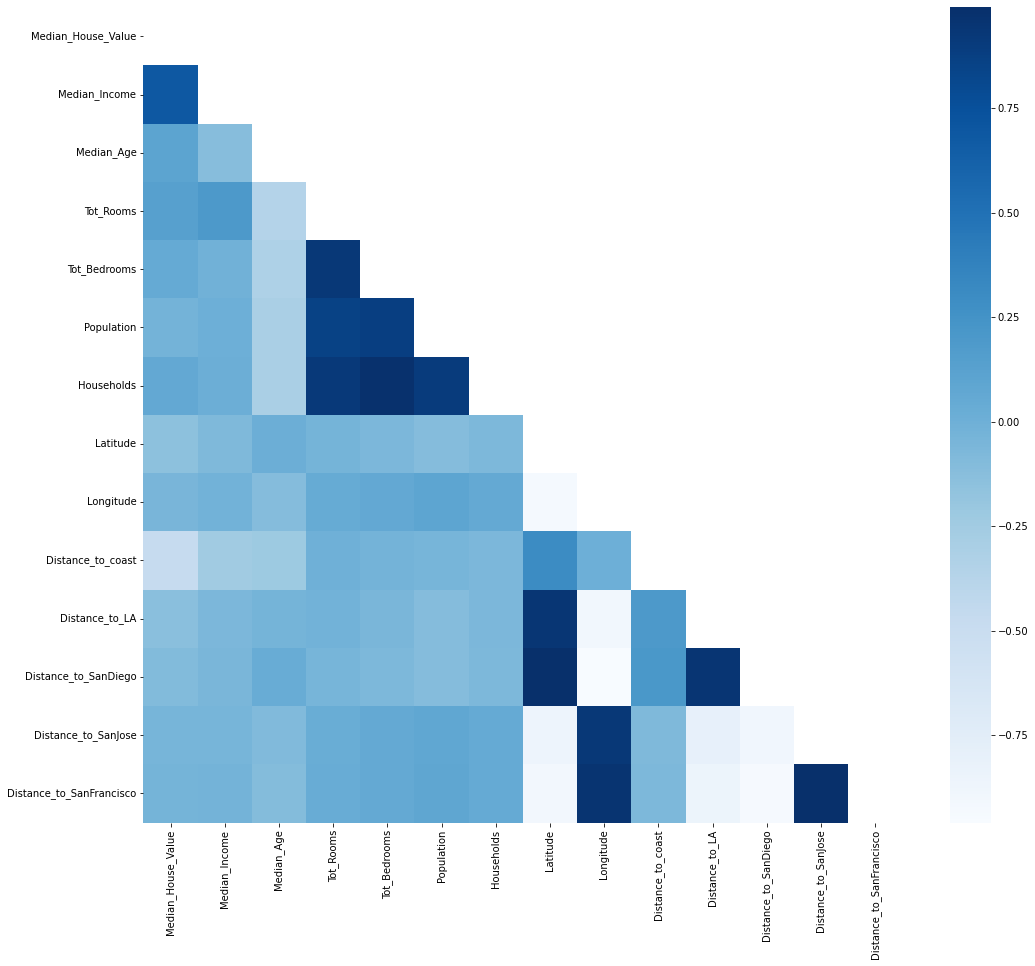

In [9]:
plt.figure(figsize=(17,15))

corr_data = np.triu(data.corr())
heat_map = sns.heatmap(data.corr(), mask = corr_data, cmap = 'Blues')
heat_map

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Median_House_Value', ylabel='Density'>

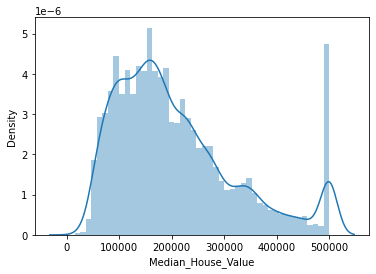

In [10]:
# House value distribution
sns.distplot(data.Median_House_Value)

array([[<AxesSubplot:title={'center':'Median_House_Value'}>,
        <AxesSubplot:title={'center':'Median_Income'}>,
        <AxesSubplot:title={'center':'Median_Age'}>,
        <AxesSubplot:title={'center':'Tot_Rooms'}>],
       [<AxesSubplot:title={'center':'Tot_Bedrooms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Households'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>,
        <AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanJose'}>,
        <AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

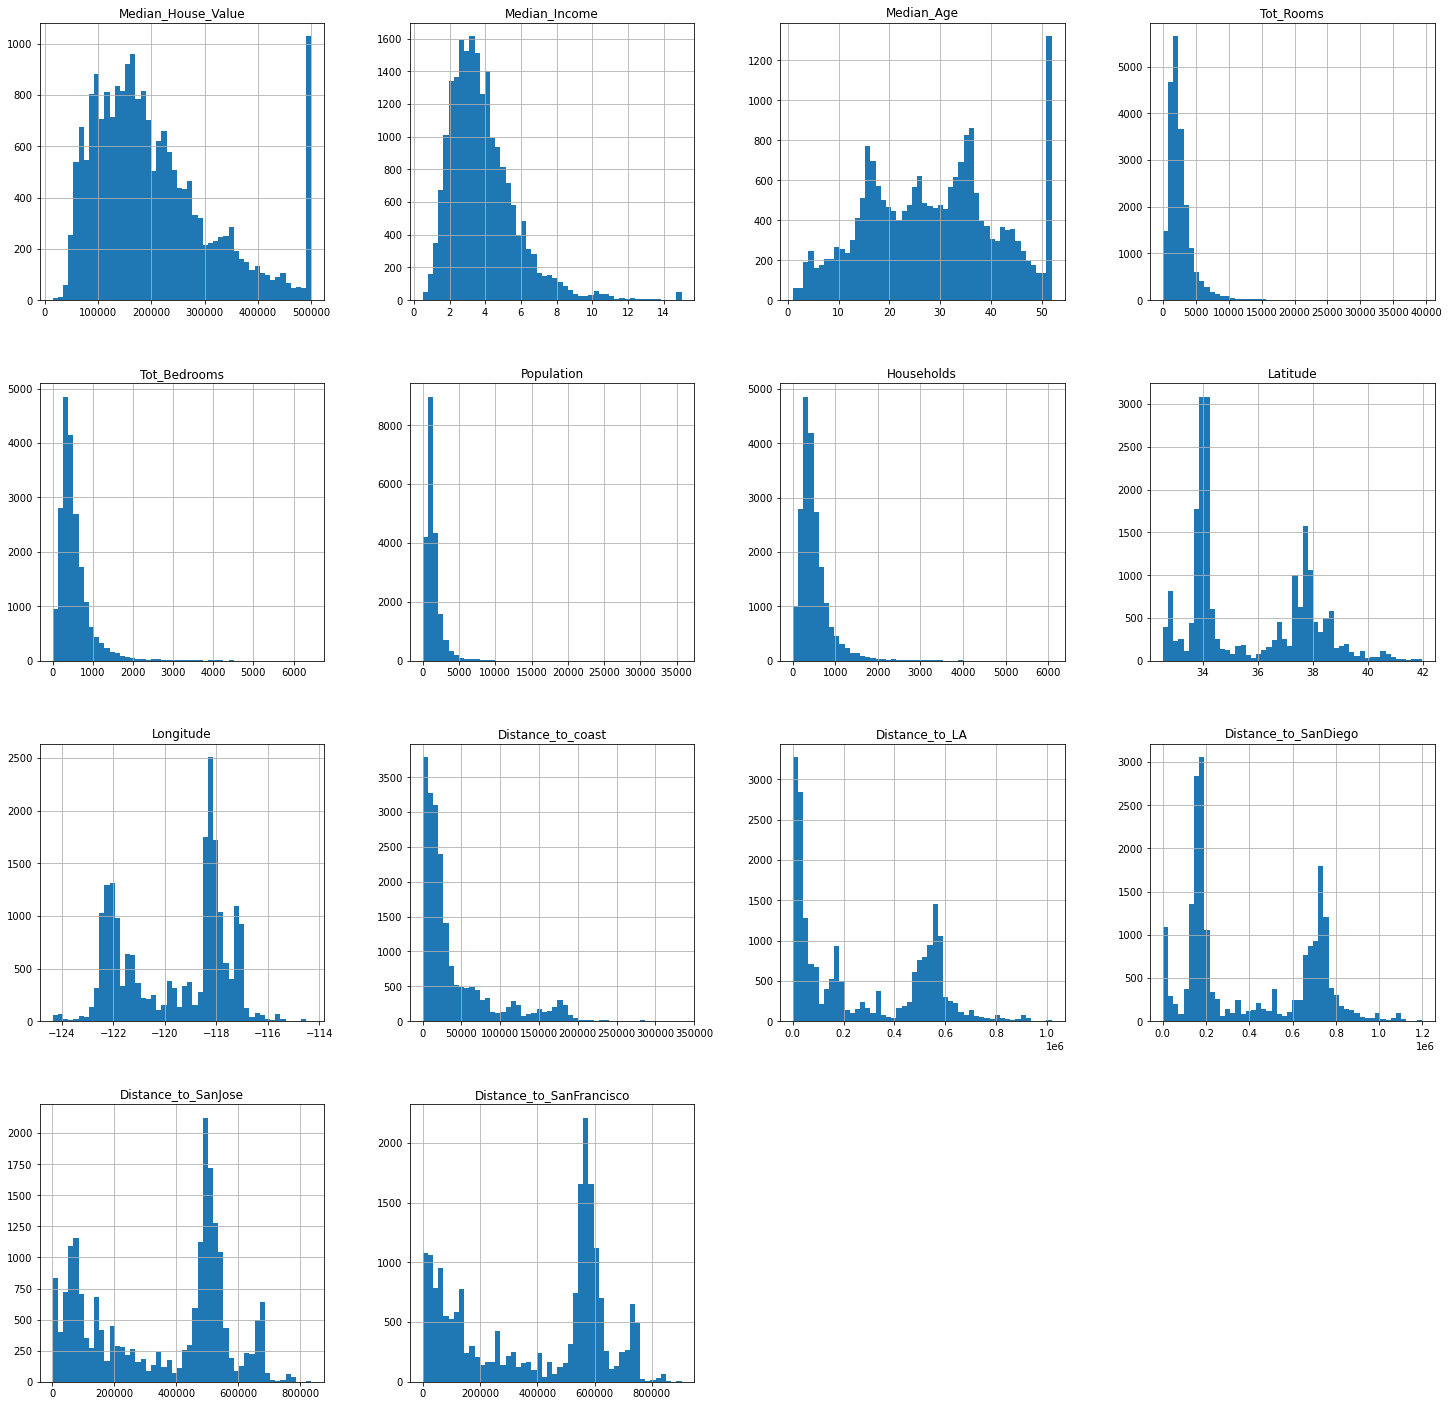

In [11]:
data.hist(figsize=(25,25), bins = 50)

#### Housing category
<p> Bin house median value into 4 categories to visualize of its surrounding homes

In [12]:
# Binning Median_House_Value
data['House_category'] = pd.cut(data['Median_House_Value'], bins = 4, labels=['Low','Mid','High','Lavish'])
data

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,House_category
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,Lavish
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,High
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,High
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,High
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417,Low
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634,Low
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232,Low
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166,Low


In [13]:
# DataFrame for each catefory of houses
dflow = data.loc[data['House_category']=='Low']
dfmid = data.loc[data['House_category']=='Mid']
dfhigh = data.loc[data['House_category']=='High']
dflavish = data.loc[data['House_category']=='Lavish']

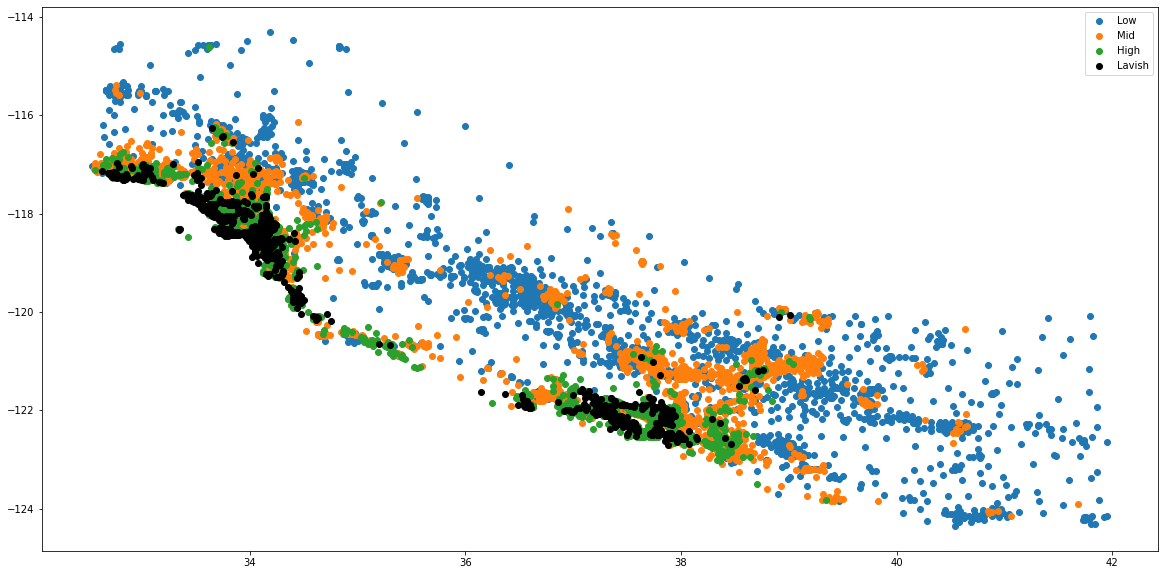

In [14]:
plt.figure(figsize=(20,10))
plt.plot(dflow['Latitude'], dflow['Longitude'], 'o', label='Low')
plt.plot(dfmid['Latitude'], dfmid['Longitude'], 'o', label='Mid')
plt.plot(dfhigh['Latitude'], dfhigh['Longitude'], 'o', label='High')
plt.plot(dflavish['Latitude'], dflavish['Longitude'], 'ko', label='Lavish')
plt.legend()

It can be seen that the lavish price houses are surrounded by high price houses. High price houses are then surrounded by mid-price houses.

In [15]:
data = data.drop('House_category', axis = 1)

#### Median income

<AxesSubplot:xlabel='Median_Income', ylabel='Median_House_Value'>

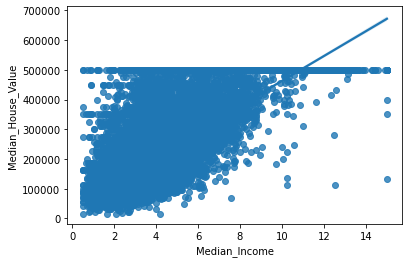

In [16]:
# Median income and House price
sns.regplot(x='Median_Income',y='Median_House_Value',data=data)

In [17]:
# Pearson correlation and p-value of Median income and Median House value
pear_coef, p_value = stats.pearsonr(data['Median_Income'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.6880752079585479 The P_value is:  0.0


##### Conclusion:
<p> The correlation coeffient between Median Income and Median price is statiscally significant, the linear relationship is quite strong 
<p> We should keep this variable

#### Total bedroom

<AxesSubplot:xlabel='Tot_Bedrooms', ylabel='Median_House_Value'>

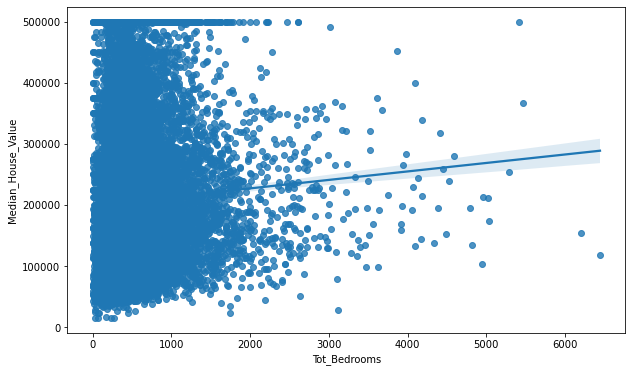

In [18]:
# Total bedrooms and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Tot_Bedrooms',y='Median_House_Value',data=data)

In [19]:
data[['Tot_Bedrooms','Median_House_Value']].corr()

,Tot_Bedrooms,Median_House_Value
Tot_Bedrooms,1.000000,0.050594
Median_House_Value,0.050594,1.000000


In [20]:
# Pearson correlation and p-value of Tot_Bedrooms and Median House value
pear_coef, p_value = stats.pearsonr(data['Tot_Bedrooms'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef)
print('The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.050593788812066415
The P_value is:  3.5201019265477303e-13


#### Conclusion:
<p> The Total of bedrooms is statistically significant but the linear relationship is extrmely weak.
<p> The Total of bedrooms itself is not very useful, we probably want to compare it to the number of rooms

In [21]:
# Creating Bedrooms_per_room variable
data['Bedrooms_per_room'] = data['Tot_Bedrooms'] / data['Tot_Rooms']
data['Bedrooms_per_room'].head(5)

0    0.146591
1    0.155797
2    0.129516
3    0.184458
4    0.172096
Name: Bedrooms_per_room, dtype: float64

In [22]:
# Check for correlation with Median House Value
pear_coef, p_value = stats.pearsonr(data['Bedrooms_per_room'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef)
print('The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.2556241671955807
The P_value is:  3.118689311524638e-305


<AxesSubplot:xlabel='Bedrooms_per_room', ylabel='Median_House_Value'>

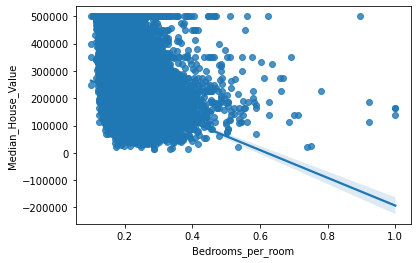

In [23]:
sns.regplot(x='Bedrooms_per_room', y= 'Median_House_Value', data = data)

#### Conclusion:
<p> The Bedrooms_per_room attribute is more correlated with the median house value than the total number of rooms or bedrooms
<p> Apparently, houses with a lower bedroom/room ratio tend to be more expensive

#### Total room

(0.0, 524251.1)

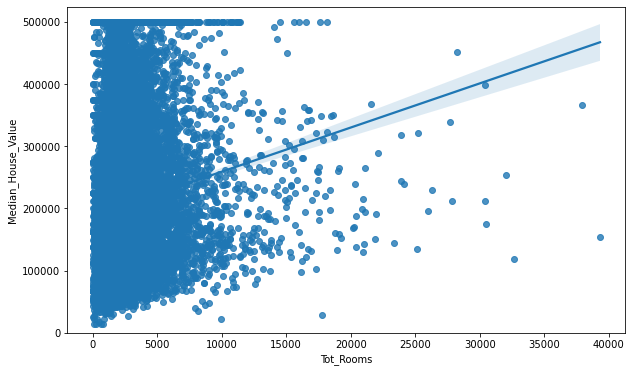

In [24]:
# Total rooms and Median House value
plt.figure(figsize=(10,6))
sns.regplot(x='Tot_Rooms',y='Median_House_Value',data=data)
plt.ylim(0,)

In [25]:
data[['Tot_Rooms','Median_House_Value']].corr()

,Tot_Rooms,Median_House_Value
Tot_Rooms,1.000000,0.134153
Median_House_Value,0.134153,1.000000


In [26]:
# Pearson correlation and p-value of Tot_Rooms and Median House value
pear_coef, p_value = stats.pearsonr(data['Tot_Rooms'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.13415311380656314 The P_value is:  1.6893845634754333e-83


##### Conclusion:
<p> Total numbers of rooms in a block is not very useful if we don't know how many houses there are within that block.
<p> A number of rooms per house will be a more interesting attribute

In [27]:
# Create Rooms_per_house
data['Rooms_per_house'] = data['Tot_Rooms']/data['Households']

In [28]:
# Pearson correlation and p-value of Rooms_per_house and Median House value
pear_coef, p_value = stats.pearsonr(data['Rooms_per_house'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.1519482897414578 The P_value is:  7.569242134631997e-107


<AxesSubplot:xlabel='Bedrooms_per_room', ylabel='Rooms_per_house'>

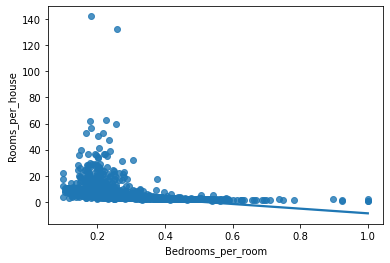

In [29]:
sns.regplot(x='Bedrooms_per_room', y= 'Rooms_per_house', data = data)

##### Conclusion:
<p> The number of rooms per house is more informative than tha total number of rooms in a block. The larger the houses, the more expensive they are

#### Total room and Total Bedroom (Multicolinearity)

<AxesSubplot:xlabel='Tot_Rooms', ylabel='Tot_Bedrooms'>

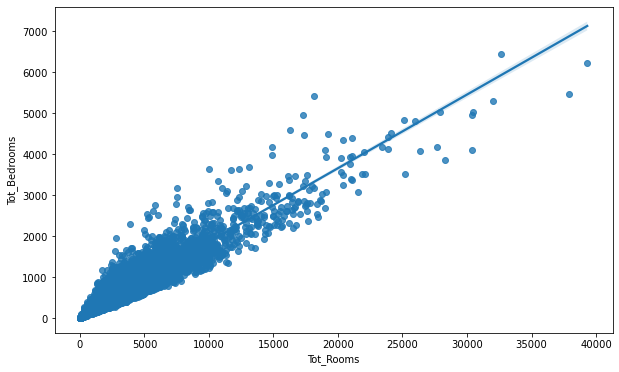

In [30]:
# Total rooms and Median House value
plt.figure(figsize=(10,6))
sns.regplot(x='Tot_Rooms',y='Tot_Bedrooms',data=data)

In [31]:
# Pearson correlation and p-value of Tot_Rooms and Tot_Bedrooms
pear_coef, p_value = stats.pearsonr(data['Tot_Rooms'], data['Tot_Bedrooms']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.9298933480131926 The P_value is:  0.0


##### Conclusion:
<p> These 2 variables have a strong correlation with each other which lead to multicollinearity problem
    

#### Population

<AxesSubplot:xlabel='Population', ylabel='Median_House_Value'>

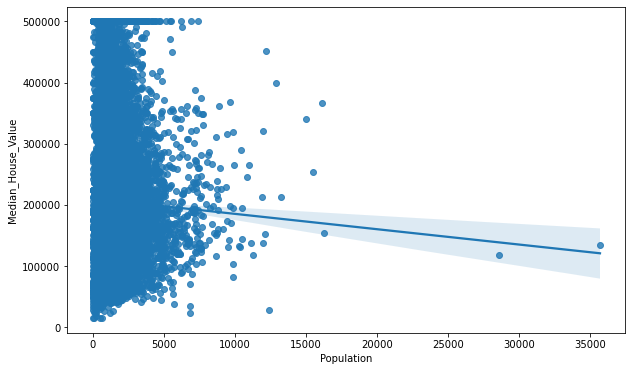

In [32]:
# Population and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Population',y='Median_House_Value',data=data)

In [33]:
# Pearson correlation and p-value of Tot_Rooms and 
pear_coef, p_value = stats.pearsonr(data['Population'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.02464967888889491 The P_value is:  0.0003976307847911049


##### Conclusion:
<p> The correlation coeffient between Population and Median house value is statiscally significant but the linear relationship is extremely weak. 
<p> The population is not really a useful attribute. However, we can calculate for the population per household which might be more interesting

In [34]:
# Creating Population_per_household
data['Population_per_household'] =  data['Population']/data['Households']

In [35]:
# Pearson correlation and p-value of Population_per_household and Median House Value
pear_coef, p_value = stats.pearsonr(data['Population_per_household'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef)
print('The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.02373741295613435
The P_value is:  0.0006483442370042923


#### Households

<AxesSubplot:xlabel='Households', ylabel='Median_House_Value'>

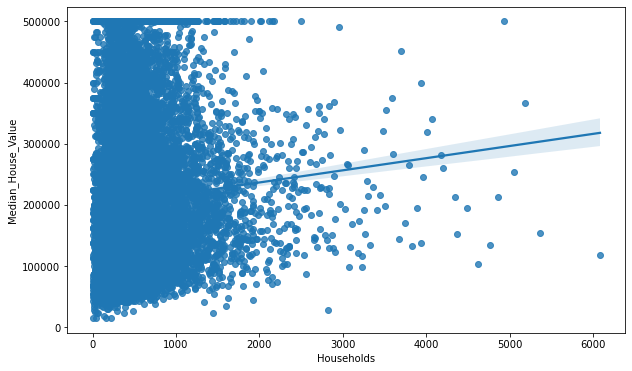

In [36]:
# Households and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Households',y='Median_House_Value',data=data)

In [37]:
# Pearson correlation and p-value of Households and Median House Value
pear_coef, p_value = stats.pearsonr(data['Households'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  0.06584265057005648 The P_value is:  2.8234206519537093e-21


##### Conclusion:
<p> The correlation coeffient between Households and Median house value is statiscally significant but the linear relationship is extremely weak. 

##### Distance_to_coast

<AxesSubplot:xlabel='Distance_to_coast', ylabel='Median_House_Value'>

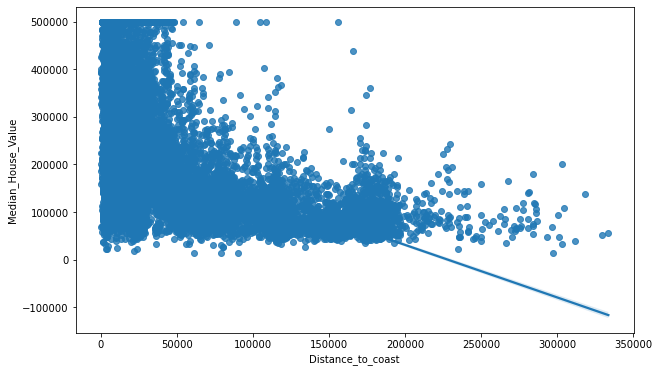

In [38]:
# Distance_to_coast and Median price
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_coast',y='Median_House_Value',data=data)

In [39]:
# Pearson correlation and p-value of Distance_to_coast and Population
pear_coef, p_value = stats.pearsonr(data['Distance_to_coast'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.469350451855051 The P_value is:  0.0


##### Conclusion:
<p> Distance_to_coast is statistically significan, but the negative linear relationship is just moderate

#### Distance_to_SanDiego

<AxesSubplot:xlabel='Distance_to_SanDiego', ylabel='Median_House_Value'>

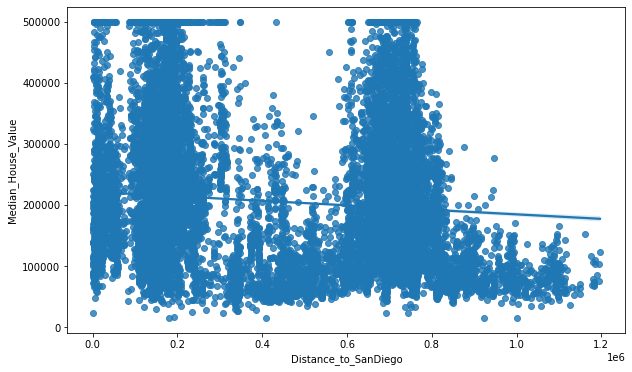

In [40]:
# Distance_to_SanDiego and Median price
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_SanDiego',y='Median_House_Value',data=data)

In [41]:
# Pearson correlation and p-value of Distance_to_SanDiego and House Value
pear_coef, p_value = stats.pearsonr(data['Distance_to_SanDiego'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.09251014492383523 The P_value is:  1.8106486302390247e-40


#### Conclusion:
<p> Distance_to_SanDiego is stattiscally significant but the linear relationship is extremely weak.

#### Distance_to_LA

<AxesSubplot:xlabel='Distance_to_LA', ylabel='Median_House_Value'>

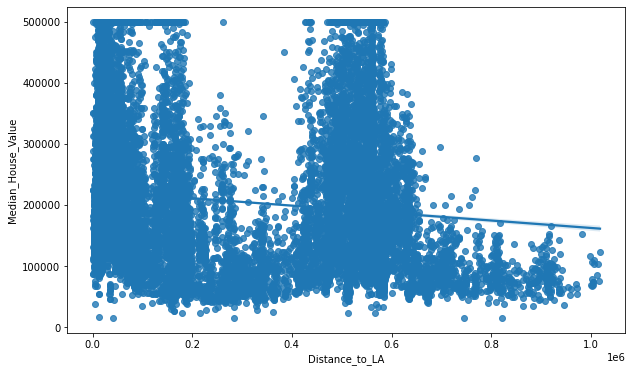

In [42]:
# Distance_to_LA and Median price
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_LA',y='Median_House_Value',data=data)

In [43]:
# Pearson correlation and p-value of Distance_to_LA and House Value
pear_coef, p_value = stats.pearsonr(data['Distance_to_LA'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.13067830439891445 The P_value is:  2.7334653819533997e-79


#### Conclusion: 
<p> Distance_to_LA is statistically significant but the negative linear relationship is extremely weak.

#### Distance_to_SanJose

<AxesSubplot:xlabel='Distance_to_SanJose', ylabel='Median_House_Value'>

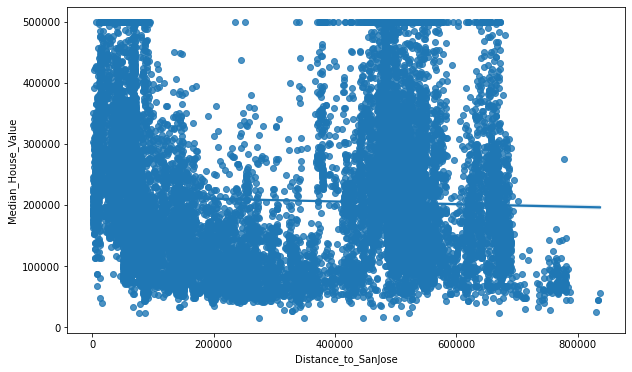

In [44]:
# Distance_to_SanJose and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_SanJose',y='Median_House_Value',data=data)

In [45]:
# Pearson correlation and p-value of Distance_to_SanJose and House Value
pear_coef, p_value = stats.pearsonr(data['Distance_to_SanJose'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.04158978421236835 The P_value is:  2.2690271222952545e-09


##### Conclusion: 
<p> Distance_to_SanJose is statistically significant but the linear relationship is extremely small. 

#### Distance_to_SanFrancisco

<AxesSubplot:xlabel='Distance_to_SanFrancisco', ylabel='Median_House_Value'>

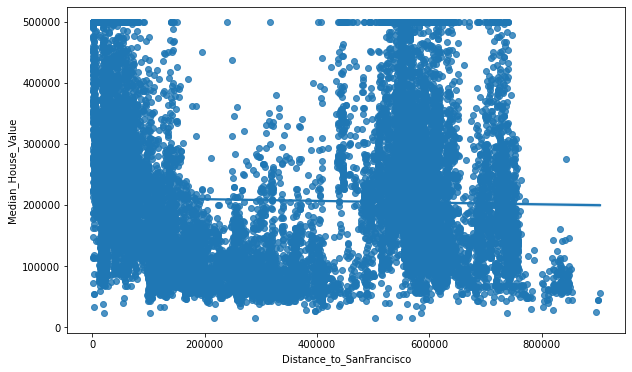

In [46]:
# Distance_to_SanFrancisco and Median house value
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_SanFrancisco',y='Median_House_Value',data=data)

In [47]:
# Pearson correlation and p-value of Distance_to_SanFrancisco and Median House Value
pear_coef, p_value = stats.pearsonr(data['Distance_to_SanFrancisco'], data['Median_House_Value']) 
print('The Pearson Correlation Coefficient is: ', pear_coef, 'The P_value is: ', p_value)

The Pearson Correlation Coefficient is:  -0.030558988110684304 The P_value is:  1.1280164681918788e-05


##### Conclusion: 
<p> Distance_to_SanFrancisco is statistically significant but the linear relationship is extremely small.

### Drop variables

In [48]:
data =data.drop(['Tot_Rooms', 'Tot_Bedrooms', 'Population'], axis =1)

In [49]:
data.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Households',
       'Latitude', 'Longitude', 'Distance_to_coast', 'Distance_to_LA',
       'Distance_to_SanDiego', 'Distance_to_SanJose',
       'Distance_to_SanFrancisco', 'Bedrooms_per_room', 'Rooms_per_house',
       'Population_per_household'],
      dtype='object')

<p> As mentioned previously, those dropped values do not have strong linear relationship. 
<p> Instead, we have create alternative features: Bedrooms_per_room, Rooms_per_house, Population_per_household

In [50]:
print('Number of features: ', len(data.columns))

Number of features:  14


# Normalization

In [51]:
data.describe()

,Median_House_Value,Median_Income,Median_Age,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Bedrooms_per_room,Rooms_per_house,Population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291,0.213075,5.429000,3.070655
std,115395.615874,1.899822,12.585558,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316,0.058023,2.474173,10.386050
min,14999.000000,0.499900,1.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313,0.100000,0.846154,0.692308
25%,119600.000000,2.563400,18.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505,0.175426,4.440716,2.429741
50%,179700.000000,3.534800,29.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701,0.203181,5.229129,2.818116
75%,264725.000000,4.743250,37.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907,0.239834,6.052381,3.282261
max,500001.000000,15.000100,52.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298,1.000000,141.909091,1243.333333


As can be seen, some features like 'Distance_to_coast','Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco'
have extremely high values which are in a different range compared to other features. 
<p> Therefore, we should normalize them into the range [0,1]

In [52]:
from sklearn import preprocessing

In [53]:
norm_feat = data[['Distance_to_coast','Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco']]
scaler = preprocessing.MinMaxScaler()
names = norm_feat.columns
d = scaler.fit_transform(norm_feat)
scale_df = pd.DataFrame(d, columns = names)
scale_df.head()

,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,0.027398,0.546362,0.614340,0.079961,0.023023
1,0.030283,0.544152,0.612446,0.077112,0.022614
2,0.024390,0.544477,0.612688,0.076894,0.020323
3,0.022918,0.545050,0.613164,0.077396,0.019459
4,0.022918,0.545050,0.613164,0.077396,0.019459


In [54]:
#drop the pre-scales features
data.drop(['Distance_to_coast','Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco' ], axis =1, inplace =True)
data.head()

,Median_House_Value,Median_Income,Median_Age,Households,Latitude,Longitude,Bedrooms_per_room,Rooms_per_house,Population_per_household
0,452600.0,8.3252,41,126,37.88,-122.23,0.146591,6.984127,2.555556
1,358500.0,8.3014,21,1138,37.86,-122.22,0.155797,6.238137,2.109842
2,352100.0,7.2574,52,177,37.85,-122.24,0.129516,8.288136,2.802260
3,341300.0,5.6431,52,219,37.85,-122.25,0.184458,5.817352,2.547945
4,342200.0,3.8462,52,259,37.85,-122.25,0.172096,6.281853,2.181467


In [55]:
# Add the scaled features
data = pd.concat([data,scale_df], axis =1)
data.head()

,Median_House_Value,Median_Income,Median_Age,Households,Latitude,Longitude,Bedrooms_per_room,Rooms_per_house,Population_per_household,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,126,37.88,-122.23,0.146591,6.984127,2.555556,0.027398,0.546362,0.614340,0.079961,0.023023
1,358500.0,8.3014,21,1138,37.86,-122.22,0.155797,6.238137,2.109842,0.030283,0.544152,0.612446,0.077112,0.022614
2,352100.0,7.2574,52,177,37.85,-122.24,0.129516,8.288136,2.802260,0.024390,0.544477,0.612688,0.076894,0.020323
3,341300.0,5.6431,52,219,37.85,-122.25,0.184458,5.817352,2.547945,0.022918,0.545050,0.613164,0.077396,0.019459
4,342200.0,3.8462,52,259,37.85,-122.25,0.172096,6.281853,2.181467,0.022918,0.545050,0.613164,0.077396,0.019459


# Split training and testing data

In [56]:
y = data['Median_House_Value']
X = data.drop('Median_House_Value', axis =1)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)

print('Number of test sample: ', X_test.shape[0])
print('Number of train sample: ', X_train.shape[0])

Number of test sample:  6192
Number of train sample:  14448


# Create ML Algorithm

# (1) Linear Regression Model

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [60]:
X.dtypes

Median_Income               float64
Median_Age                    int64
Households                    int64
Latitude                    float64
Longitude                   float64
Bedrooms_per_room           float64
Rooms_per_house             float64
Population_per_household    float64
Distance_to_coast           float64
Distance_to_LA              float64
Distance_to_SanDiego        float64
Distance_to_SanJose         float64
Distance_to_SanFrancisco    float64
dtype: object

In [61]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = lin_reg.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print('The Mean Square Error is: ', mse)
#R_square
R_square = lin_reg.score(X_test, y_test)
print('R square is: ', R_square)

The Mean Square Error is:  5138772581.691414
R square is:  0.6291926294194514


The Model has an accuracy of around 62,92%

In [64]:
# test the residuals
test_redidual = y_test - y_pred
test_redidual

10683    167982.050383
13925     88642.176097
15855     -2024.480895
10498    -58783.892355
10610     30852.726502
             ...      
5163     -48301.602436
2629    -103897.679208
7071     -75447.793631
10032     37657.285522
6788     -31263.868766
Name: Median_House_Value, Length: 6192, dtype: float64

Text(0.5, 1.0, 'Resisual Plot')

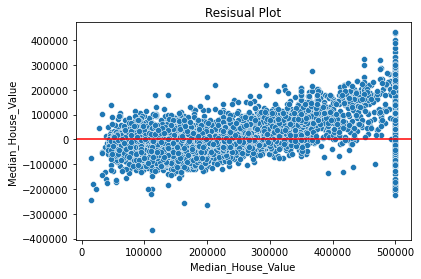

In [65]:
sns.scatterplot(x=y_test, y=test_redidual)
plt.axhline(y=0, color='red')
plt.title('Resisual Plot')

<p> We can see that the data the points are normally distributes along the line, so we can conclude that that underlying dataset is a valid choice for Linear Regression.
    
<p> As for the low model accuracy, it might be because of less data and also in model coefficients we 

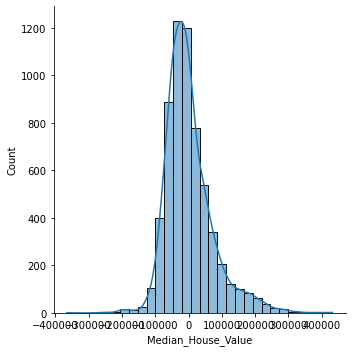

In [66]:
sns.displot(test_redidual, bins = 30, kde = True)

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarni

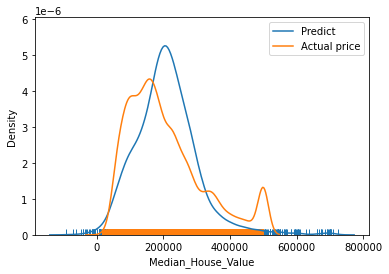

In [67]:
# Write code to show distribution plots
sns.distplot(y_pred, hist = False, rug = True)
sns.distplot(data['Median_House_Value'], hist = False, rug = True)
plt.legend(labels =['Predict', 'Actual price'])
plt.show()

# Regression using Log prices

In [68]:
prices = np.log(data['Median_House_Value'])
features = data.drop('Median_House_Value', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size= 0.2)

lin_reg_1 = LinearRegression()
y_pred_1 = lin_reg_1.fit(X_train, y_train)

print('Intercept', lin_reg_1.intercept_)
pd.DataFrame(data = lin_reg_1.coef_, index=X_train.columns, columns=['Coef'])

Intercept -4.122419469470374


,Coef
Median_Income,0.173622
Median_Age,0.001584
Households,0.000106
Latitude,-0.058962
Longitude,-0.148454
Bedrooms_per_room,0.991383
Rooms_per_house,0.020648
Population_per_household,-0.001604
Distance_to_coast,-1.000689
Distance_to_LA,-0.694266


In [69]:
lin_reg_1.score(X_train, y_train)

0.6545984071467493

#### We can see that the model has an accuracy of around 65.58%

### Polynomial Model

In [70]:
from sklearn.preprocessing import PolynomialFeatures

In [71]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [73]:
X_tran_pr = pr.fit_transform(X_train)
print('The number of features of original data :', X_train.shape[1])
print('After the transformation, the number of features are:', X_tran_pr.shape[1])

The number of features of original data : 13
After the transformation, the number of features are: 105


In [74]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_tran_pr, y_train)

LinearRegression()

In [75]:
y_pred_3 = lin_reg_3.predict(X_tran_pr)

In [76]:
lin_reg_3.score(X_tran_pr, y_train)

0.7805397596888055

###### The model has an accuracy of 78,05%

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarni

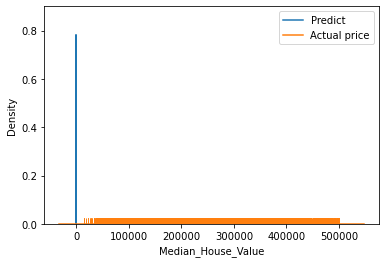

In [79]:
sns.distplot(y_pred_3, hist = False, rug = True)
sns.distplot(data['Median_House_Value'], hist = False, rug = True)
plt.legend(labels =['Predict', 'Actual price'])
plt.show()

In [ ]:
data.corr()['Median_House_Value'][:]

In [80]:
X_train_drop = X_train.drop(['Latitude', 'Longitude','Distance_to_SanDiego', 
                             'Distance_to_SanFrancisco', 'Distance_to_SanJose'], axis = 1)
X_test_drop = X_test.drop(['Latitude', 'Longitude','Distance_to_SanDiego', 'Distance_to_SanFrancisco', 'Distance_to_SanJose'], axis = 1)
line_reg_4 = LinearRegression()
line_reg_4.fit(X_train_drop, y_train)
y_pred_4 = line_reg_4.predict(X_test_drop)
R_square_4 = lin_reg_4.score(X_test_drop, y_test)
R_square_4

NameError: name 'lin_reg_4' is not defined

# (2) Random Forest

# (3) Support Vector Machine